In [3]:
from scipy import signal
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load data from matlab file
mat_data = loadmat('data_glider_ctd_casts.mat', squeeze_me = True)

glider_ctd_profiles = mat_data['glider_ctd_profiles']


In [5]:
# get varaibles from all vertical profiles. 
# variables are stored in tuples; each variable stores 131 arrays.

# z in m, values are negative
glider_ctd_profiles_z = glider_ctd_profiles['z'][()][:]

# glider_ctd_profiles_potential_temperature[1]

# temperature in C
glider_ctd_profiles_potential_temperature = glider_ctd_profiles['potential_temperature'][()][:]
glider_ctd_profiles_conservative_temperature = glider_ctd_profiles['conservative_temperature'][()][:]

# salinity
glider_ctd_profiles_practical_salinity = glider_ctd_profiles['practical_salinity'][()][:]
glider_ctd_profiles_absolute_salinity = glider_ctd_profiles['absolute_salinity'][()][:]

# density in kg/m^3
glider_ctd_profiles_density = glider_ctd_profiles['density'][()][:]
glider_ctd_profiles_density_anomaly = glider_ctd_profiles['density_anomaly'][()][:]

In [6]:
# define gaussian filter
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2*np.pi * np.power(sig, 2.)))

(10,) (445,) (445,)


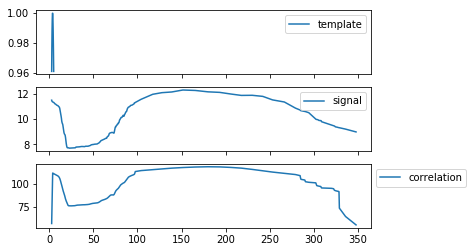

In [7]:
# test gaussian filter on glider data

pulse = gaussian(np.linspace(0,1,10),0.5,1)
data_array = glider_ctd_profiles_potential_temperature[40][:,]
coord = -glider_ctd_profiles_z[40][:,]
# corr_array = signal.correlate(data_array, pulse,  mode='same') # x-correlation
corr_array = signal.convolve(data_array, pulse,  mode='same') # x-correlation

print(np.shape(pulse), np.shape(data_array), np.shape(corr_array))

loc = np.where(np.abs(corr_array) == np.max(np.abs(corr_array))) # grab location of max correlation, later build in option to use absolute or not
loc_med = np.median(loc)

# fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True)
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.plot(coord[:len(pulse)],pulse, label='template')
ax1.plot(coord,data_array, label='signal')
ax2.plot(coord,corr_array, label='correlation')
# ax3.plot(coord[:len(pulse)]+coord[loc_med]-coord[len(pulse)]/2., pulse, label='shifted template')

# for ax in [ax0,ax1,ax2,ax3]:
for ax in [ax0,ax1,ax2]:
    ax.legend(bbox_to_anchor=(1,1))